# 8. 머신러닝 프로세스5: 모델평가

## 8-1. 데이터 불러오기 및 데이터셋 분할

In [5]:
# 데이터로드
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('max_columns', None)
data = pd.read_csv('../제공자료/Fvote.csv', encoding='utf-8')

In [6]:
data

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,1,0,0,0,0,1,1,4,4,3,3,1.8,1,2
207,0,1,0,0,0,1,0,2,1,2,3,4,2.6,1,4
208,0,1,1,0,0,0,0,2,1,2,3,3,2.6,1,2
209,0,1,0,0,0,1,0,2,3,4,3,2,4.0,1,4


In [7]:
X=data[data.columns[1:13]]
y=data[['vote']]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

## 8-2. Grid Search

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# print(help(LogisticRegression))
param_grid ={'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [10]:
grid_search =GridSearchCV(LogisticRegression(),param_grid, cv=5, return_train_score= True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [11]:
# 그리드서치 하이퍼파라미터별 상세 결과값
# cv_results_
result_grid= pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004802,0.001157,0.001594,0.000486,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.005010,0.001104,0.001602,0.000493,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.007195,0.000744,0.001388,0.000489,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,0.774194,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.009794,0.001171,0.001408,0.000500,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,0.806452,0.714919,0.079466,4,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.011797,0.001722,0.001190,0.000399,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.013803,0.001321,0.001000,0.000002,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


<function matplotlib.pyplot.legend(*args, **kwargs)>

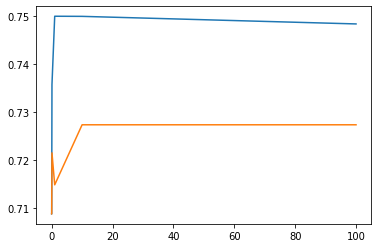

In [12]:
# 하이퍼파리미터(C)값에 따른 훈련데이터와 테스트데이터의 정확도(accuracy) 그래프
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'],label ='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'],label='Test')
plt.legend

## 8-3. Random Search

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distrib={'C': randint(low=0.001, high=100)}

In [14]:
from sklearn.linear_model import LogisticRegression

In [16]:
random_search =RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=param_distrib,
                                  cv =5,
                                  return_train_score=True)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002240FA35970>},
                   return_train_score=True)

In [24]:
print("best_hyparam:{}".format(random_search.best_params_))
print("best Cross_validity_score:{:.3f}".format(random_search.best_score_))

best_hyparam:{'C': 35}
best Cross_validity_score:0.727


In [18]:
print("test:{}".format(random_search.score(X_test,y_test)))

test:0.6792452830188679


In [22]:
result_random = random_search.cv_results_
result_random= pd.DataFrame(result_random)

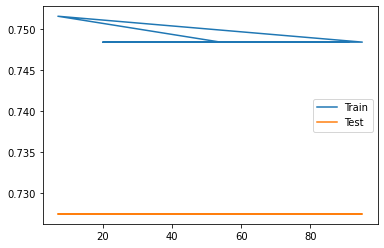

In [23]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_C'], result_random['mean_train_score'], label='Train')
plt.plot(result_random['param_C'], result_random['mean_test_score'], label='Test')
plt.legend()

## 8-4. 모델평가

In [25]:
# 모델탐색 결과, 최적의 하이퍼파리미터 결정 및 적용
final_model =LogisticRegression(C=35)
final_model.fit(X_train,y_train)

LogisticRegression(C=35)

In [26]:
# 훈련데이터의 정확도(accuracy) 결과
pred_train = final_model.predict(X_train)
final_model.score(X_train,y_train)

0.740506329113924

In [28]:
# 테스트데이터의 정확도(accuracy) 결과
pred_test = final_model.predict(X_test)
final_model.score(X_test,y_test)

0.6792452830188679

In [39]:
# 훈련데이터의 혼동행렬
from sklearn.metrics import confusion_matrix

confusion_train =confusion_matrix(y_train, pred_train)
# print(help(confusion_matrix))
print(confusion_train)


[[ 12  34]
 [  7 105]]


In [40]:
# 훈련데이터의 분류 모델 평가 결과
from sklearn.metrics import classification_report
cf_report_train = classification_report(y_train, pred_train)
print("분류예측 레포트: \n", cf_report_train)

분류예측 레포트: 
               precision    recall  f1-score   support

           0       0.63      0.26      0.37        46
           1       0.76      0.94      0.84       112

    accuracy                           0.74       158
   macro avg       0.69      0.60      0.60       158
weighted avg       0.72      0.74      0.70       158



In [41]:
# 테스트 데이터 분류모델 평가 결과
from sklearn.metrics import classification_report
cf_report_test = classification_report(y_test, pred_test)
print("분류예측 레프트: \n", cf_report_test)

분류예측 레프트: 
               precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.73      0.87      0.80        38

    accuracy                           0.68        53
   macro avg       0.55      0.53      0.53        53
weighted avg       0.63      0.68      0.64        53



In [47]:
# ROC 계산을 위한 라이브러리 및 산출식
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test, final_model.decision_function(X_test))

In [48]:
print(roc_auc)

0.6350877192982456
